In [891]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score

In [892]:
df = pd.read_csv("fma-rock-vs-hiphop.csv")
music_features = pd.read_json('echonest-metrics.json',precise_float=True)

In [893]:
music_features.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


In [894]:
df.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [895]:
data=music_features.merge(df[['genre_top', 'track_id']], on='track_id')

In [896]:
data.isnull().sum()

track_id            0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
speechiness         0
tempo               0
valence             0
genre_top           0
dtype: int64

In [897]:
data.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,Hip-Hop
4,153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,Rock


In [898]:
data.shape

(4802, 10)

<AxesSubplot:>

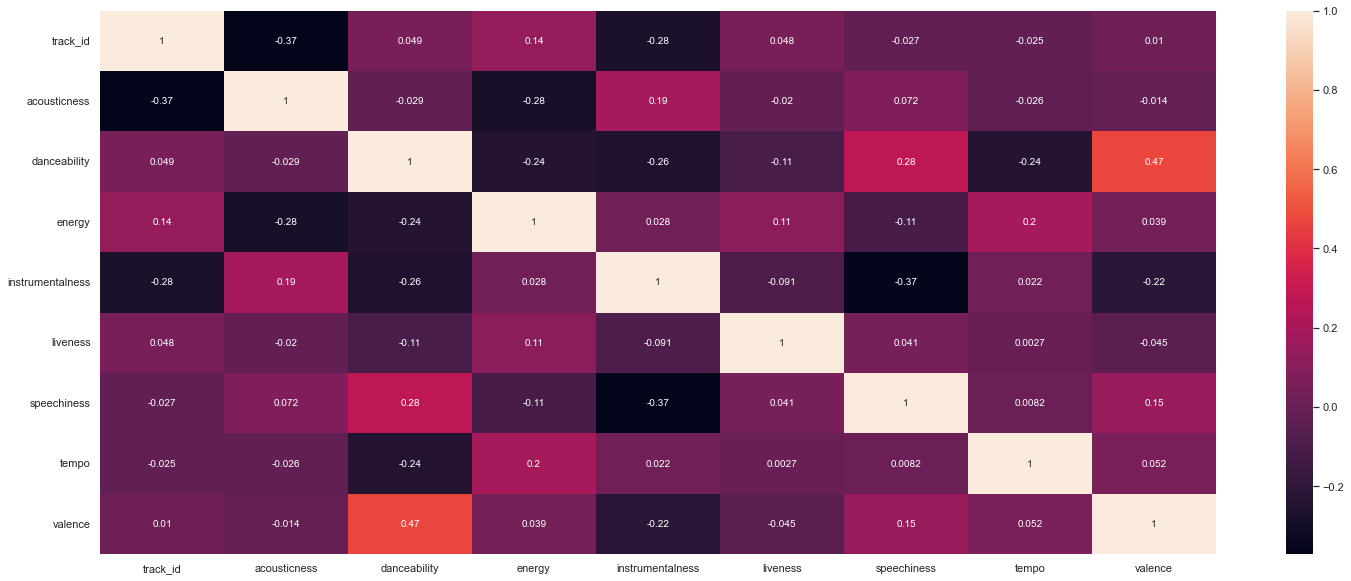

In [899]:

fig, ax = plt.subplots(figsize=(25,10))
sns.heatmap(data.corr(), annot=True)


In [900]:
X = data.drop(['genre_top','track_id'],axis=1)
y = data['genre_top']

In [901]:
#change hiphop to 1 and rock to 0
y[y == 'hiphop'] = 1
y[y == 'rock'] = 0

C:\Users\elwan\AppData\Local\Temp/ipykernel_9292/910051849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y == 'hiphop'] = 1
C:\Users\elwan\AppData\Local\Temp/ipykernel_9292/910051849.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y == 'rock'] = 0


In [902]:
y

0       Hip-Hop
1       Hip-Hop
2       Hip-Hop
3       Hip-Hop
4          Rock
         ...   
4797    Hip-Hop
4798    Hip-Hop
4799    Hip-Hop
4800    Hip-Hop
4801    Hip-Hop
Name: genre_top, Length: 4802, dtype: object

In [903]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)


In [904]:
X.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072
4,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018


In [905]:
pca = PCA()
pca.fit(scaled_features)
exp_variance = pca.explained_variance_ratio_
num_components = pca.n_components_

Text(0.5, 0, 'Principal Component #')

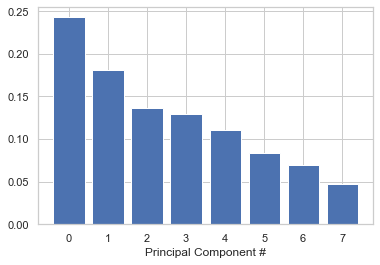

In [906]:
fig, ax = plt.subplots()
ax.bar(range(num_components), exp_variance)
ax.set_xlabel('Principal Component #')

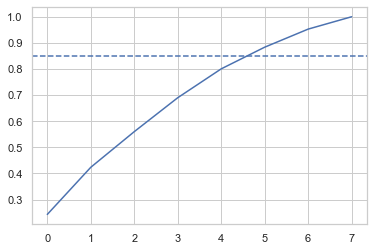

In [907]:
cum_exp_variance = np.cumsum(exp_variance)

fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.85, linestyle='--')

In [908]:
n_components = 6

pca = PCA(n_components, random_state=10)
pca.fit(scaled_features)
pca_projection = pca.transform(scaled_features)

In [909]:
pca_projection.shape

(4802, 6)

In [910]:
#test split data
X_train, X_test, y_train, y_test = train_test_split(pca_projection, y, test_size=0.2, random_state=10)


In [911]:
model_dt = DecisionTreeClassifier(random_state=10)
model_dt.fit(X_train,y_train)
dt_pred = model_dt.predict(X_test)
print("Accuracy of Decision Tree Classifier:",metrics.accuracy_score(y_test, dt_pred))

Accuracy of Decision Tree Classifier: 0.8616024973985432


In [912]:
model_lr = LogisticRegression(random_state=10)
model_lr.fit(X_train,y_train)
lg_pred = model_lr.predict(X_test)
print("Accuracy of Logistic Regression:",metrics.accuracy_score(y_test, lg_pred))

Accuracy of Logistic Regression: 0.8834547346514048


In [913]:
print(classification_report(y_test, dt_pred))
print(classification_report(y_test, lg_pred))

              precision    recall  f1-score   support

     Hip-Hop       0.65      0.63      0.64       188
        Rock       0.91      0.92      0.91       773

    accuracy                           0.86       961
   macro avg       0.78      0.77      0.78       961
weighted avg       0.86      0.86      0.86       961

              precision    recall  f1-score   support

     Hip-Hop       0.79      0.55      0.65       188
        Rock       0.90      0.97      0.93       773

    accuracy                           0.88       961
   macro avg       0.85      0.76      0.79       961
weighted avg       0.88      0.88      0.87       961



c:\Users\elwan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='genre_top', ylabel='count'>

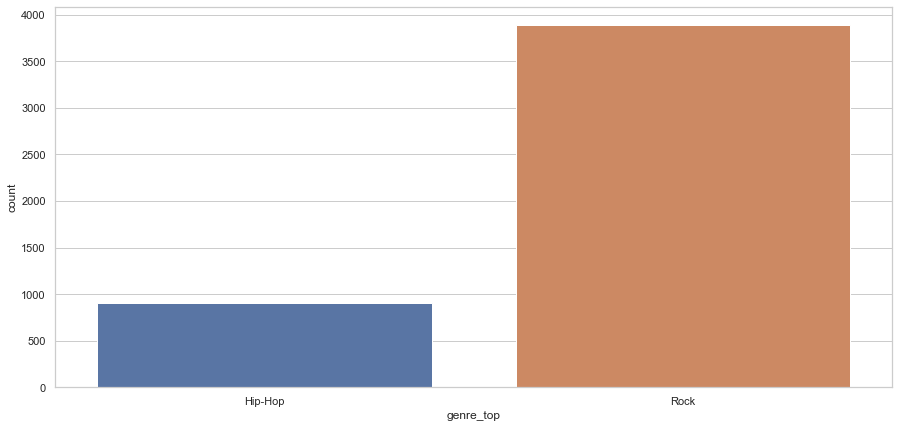

In [914]:
sns.set(style="whitegrid")
#size of the figure
plt.figure(figsize=(15,7))
sns.set(style="whitegrid", color_codes=True)

sns.countplot(data['genre_top'], label = "Count") 


In [915]:
hip_hop = data.loc[data['genre_top'] == 'Hip-Hop']
rock = data.loc[data['genre_top'] == 'Rock']

In [916]:
print(hip_hop.shape)
print(rock.shape)


(910, 10)
(3892, 10)


In [917]:
rock = rock.sample(hip_hop.shape[0], random_state=10)


In [918]:
new_data = pd.concat([rock, hip_hop])
new_data.shape



(1820, 10)

In [919]:
X = new_data.drop(['genre_top', 'track_id'], axis=1) 
y = new_data['genre_top']

In [920]:
pca_projection = pca.fit_transform(scaler.fit_transform(X))
pca_projection.shape

(1820, 6)

In [921]:
y = new_data['genre_top']
y = y.replace(['Hip-Hop', 'Rock'], [1, 0])
y.head()


773     0
2273    0
2846    0
2147    0
2654    0
Name: genre_top, dtype: int64

In [922]:
X_train, X_test, y_train, y_test = train_test_split(pca_projection, y, random_state=10)


In [923]:
model_dt = DecisionTreeClassifier(random_state=10)
model_dt.fit(X_train,y_train)
predictions_dt = model_dt.predict(X_test)
print("Accuracy of Decision Tree Classifier:",metrics.accuracy_score(y_test, predictions_dt))
print(classification_report(y_test, predictions_dt))

Accuracy of Decision Tree Classifier: 0.7362637362637363
              precision    recall  f1-score   support

           0       0.73      0.74      0.73       225
           1       0.74      0.73      0.74       230

    accuracy                           0.74       455
   macro avg       0.74      0.74      0.74       455
weighted avg       0.74      0.74      0.74       455



In [924]:
model_lr = LogisticRegression(random_state=10)
model_lr.fit(X_train,y_train)
predictions_lr = model_lr.predict(X_test)
print("Accuracy of Logistic Regression:",metrics.accuracy_score(y_test, predictions_lr))
print(classification_report(y_test, predictions_lr))


Accuracy of Logistic Regression: 0.8219780219780219
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       225
           1       0.84      0.80      0.82       230

    accuracy                           0.82       455
   macro avg       0.82      0.82      0.82       455
weighted avg       0.82      0.82      0.82       455



In [926]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=10, random_state=10 , shuffle=True)
dt_scores = cross_val_score(model_dt, pca_projection, y, cv=kfold)
print("Decision Tree Accuracy:",dt_scores.mean())



kfold = KFold(n_splits=10, random_state=10 , shuffle=True)
lr_scores = cross_val_score(model_lr, pca_projection, y, cv=kfold)
print("Logistic Regression Accuracy:",lr_scores.mean())


Decision Tree Accuracy: 0.7719780219780219
Logistic Regression Accuracy: 0.823076923076923
